In [2]:
# Import of required libraries and packages
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import numpy as np

print(ig.__version__)

0.8.0


## Task 1: Reading Data Files

In [3]:
# Open network file
# from http://vlado.fmf.uni-lj.si/pub/networks/data/mix/USAir97.net
# also available on Toledo
# download to your local drive 

#filename = easygui.fileopenbox()
filename = "./USAir97.net"
print(filename)

g = ig.Graph.Read_Pajek(filename)

ig.summary(g)
g.is_weighted()


./USAir97.net
IGRAPH UNW- 332 2126 -- 
+ attr: id (v), name (v), x (v), y (v), z (v), weight (e)


True

In [4]:
# Get the attributes and the number of nodes
print(g.vs.attribute_names())
print(g.vcount())



['id', 'name', 'x', 'y', 'z']
332


In [5]:
# Get the attributes and the number of edges
print(g.es.attribute_names())
print(g.ecount())


['weight']
2126


## Task 2: Calculating Centrality Measures

Number of degrees calculated :  332, minimum :  1, maximim :  139
Betweeness: minimum:  0.00, maximum:  11376.63


array([[1.        , 0.70437557],
       [0.70437557, 1.        ]])

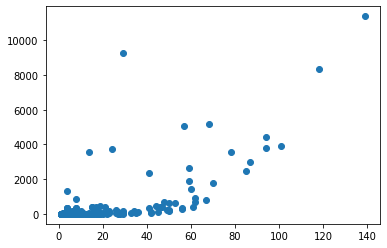

In [6]:
# Calculate centrality measures
degree = g.degree()
betweenness = g.betweenness(weights=None)
print("Number of degrees calculated : % 2d, minimum : % 2d, maximim : % 2d" %(len(degree), min(degree), max(degree)))
print("Betweeness: minimum: % 5.2f, maximum: % 5.2f" %(min(betweenness),max(betweenness)))

apl = g.average_path_length()

cls = g.closeness()
trans = g.transitivity_local_undirected() # Local clustering coefficient

plt.scatter(degree, betweenness)

np.corrcoef(degree, betweenness)



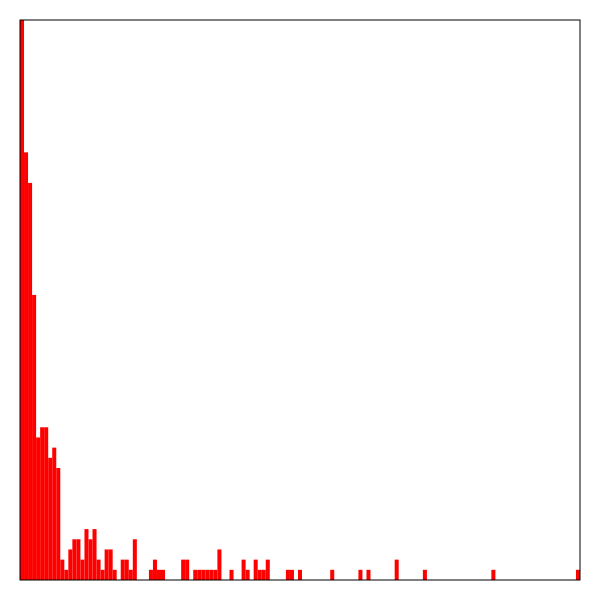

In [7]:
# Using the default igraph function for the calculation and plotting of the degree distribution
deg_dist = g.degree_distribution()
ig.plot(deg_dist)

139
[164  69  21  20  10   9   3   2   5   5   4   5   4   2   1   1   0   2
   2   0   1   0   0   1   0   0   0   1]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140.]


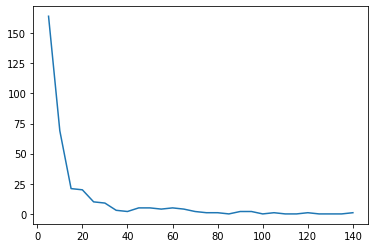

In [8]:
# Improved calculation of degree distribution and plotting using numpy and matplotlib
print(max(degree))
hist,bins=np.histogram(degree,bins=np.linspace(0,140,29))
print(hist)
print(bins) 
plt.plot(bins[1:],hist)

## Task 3: Graph Processing

In [9]:
# Average degree
avg_deg = np.average(degree)
print("Average degree: % 2d" %(avg_deg))

# Convert list of node degree to an np.array 
# This allows the use of functions from numpy
np_deg = np.array(degree)

np_deg = np.where(np_deg>=avg_deg)
print("Number of nodes with degree equal to or greater than the average degree: % 2d" %(len(np_deg[0])))

#Create subgraph using IDs of nodes to be retained
red_g = g.subgraph(np_deg[0])
print("Number of nodes in subgraph: % 2d" %(len(red_g.vs())))

Average degree:  12
Number of nodes with degree equal to or greater than the average degree:  85
Number of nodes in subgraph:  85


## Task 4: Network Visualization

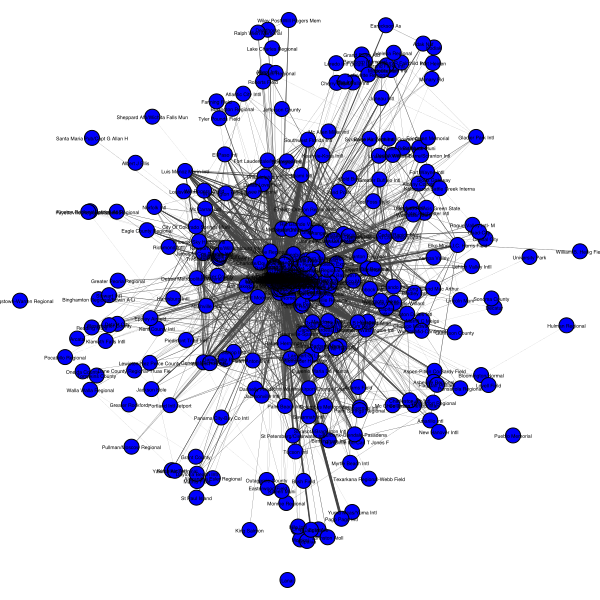

In [10]:
# Calculate Kamada-Kawai layout
layout_kk = g.layout("kk")

#Define style from network plotting
visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [ 5 * w for w in g.es["weight"]]
visual_style["layout"] = layout_kk
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(g, **visual_style)

#ig.plot(g, easygui.filesavebox(), **visual_style)

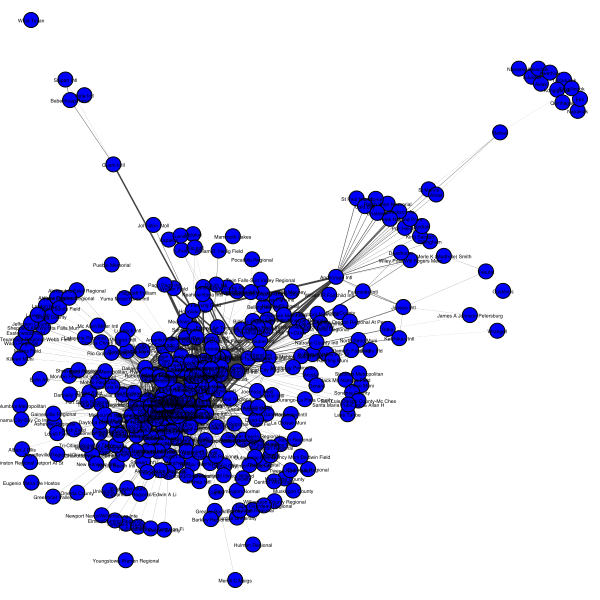

In [11]:
# Calculate Fruchterman-Reingold layout
layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [ 5 * w for w in g.es["weight"]]
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(g, **visual_style)

#ig.plot(g, easygui.filesavebox(), **visual_style)

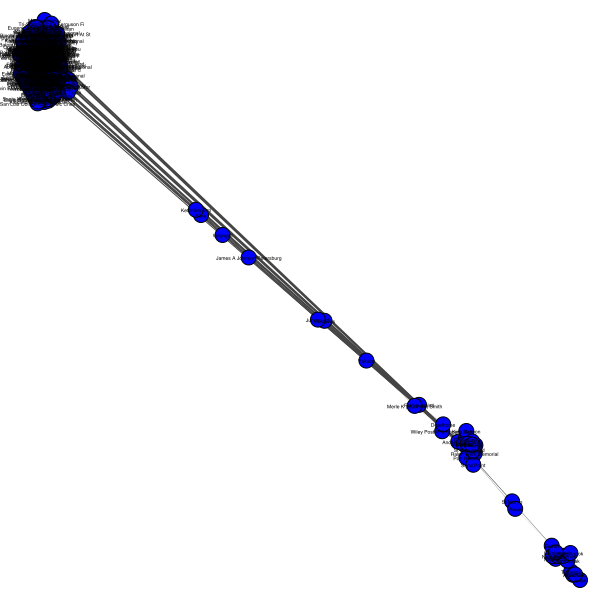

In [12]:
# Calculate DRL layout
layout_drl = g.layout("drl")

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [ 5 * w for w in g.es["weight"]]
visual_style["layout"] = layout_drl
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(g, **visual_style)

#ig.plot(g, easygui.filesavebox(), **visual_style)

## Task 5: Shortest Path

In [15]:
# Node Sheppard Afb/Wichita Falls Mun
id1 = g.vs["name"].index("Sheppard Afb/Wichita Falls Mun")
id2 = g.vs["name"].index("West Tinian")
print("Sheppard Afb/Wichita Falls Mun = % 2d, West Tinian = % 2d" %(id1, id2))

Sheppard Afb/Wichita Falls Mun =  246, West Tinian =  331


In [16]:
# Nodes extrated from shortest path
path= g.get_shortest_paths(id1, id2)
print(path)

for n in path[0]:
    print("{}".format(g.vs[n]['id']))

[[246, 260, 312, 328, 326, 331]]
Sheppard Afb/Wichita Falls Mun
Dallas/Fort Worth Intl
Honolulu Intl
Guam Intll
Saipan Intl
West Tinian


In [17]:
# Edges extrated from shortest path
epath= g.get_shortest_paths(id1, id2,output="epath")
print(epath)
for n in epath[0]:
    print("edge: % 2d; % 2d -- % 2d" %(n, g.es[n].source,g.es[n].target))

[[127, 54, 574, 1521, 1677]]
edge:  127;  246 --  260
edge:  54;  260 --  312
edge:  574;  312 --  328
edge:  1521;  326 --  328
edge:  1677;  326 --  331


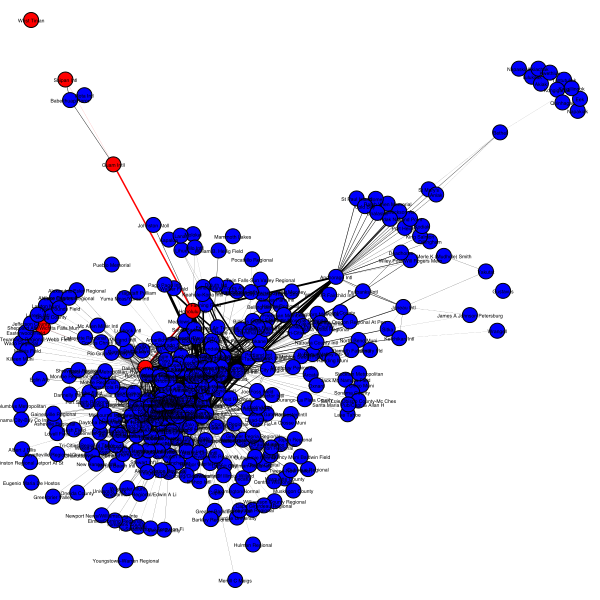

In [18]:
# Visualize the shortest path in the Fruchterman-Reingold layout
vcolor = ["blue"]*g.vcount()
for n in path[0]:
  vcolor[n]="red"

ecolor = ["black"]*g.ecount()
for n in epath[0]:
  ecolor[n]="red"

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = vcolor
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [ 5 * w for w in g.es["weight"]]
visual_style["edge_color"] = ecolor
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(g, **visual_style)

#ig.plot(g, easygui.filesavebox(), **visual_style)

## Task 6: Export network and visualizations

In [88]:
filename = easygui.filesavebox()
g.save(filename)

#ig.plot(g, easygui.filesavebox(), **visual_style)